<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Interesting_Code/Demo_first_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First example: Python for collecting data from the web

In [1]:
!pip install beautifulsoup4

In [6]:
#import the library used to query a website
import urllib.request
#import the Beautiful soup functions to parse the data returned from the website
from bs4 import BeautifulSoup
import pandas as pd

url = "https://forecast.weather.gov/MapClick.php?textField1=33.22&textField2=-97.15#.XaXfI0ZKjb0"
#Query the website and return the html to the variable 'page'
page = urllib.request.urlopen(url)
#Parse the html in the 'page' variable, and store it in Beautiful Soup format
soup = BeautifulSoup(page)
# return the section that contains the seven day weather information by using the div "id"
seven_day = soup.find(id="seven-day-forecast")
# return weather information for each day
forecast_items = seven_day.find_all(class_="tombstone-container")

# tonight information: select the first item in the list
tonight = forecast_items[0]
period = tonight.find(class_="period-name").get_text()
short_desc = tonight.find(class_="short-desc").get_text()
temp = tonight.find(class_="temp").get_text()
img = tonight.find("img")
desc = img['title']
period_tags = seven_day.select(".tombstone-container .period-name")
periods = [pt.get_text() for pt in period_tags]
short_descs = [sd.get_text() for sd in seven_day.select(".tombstone-container .short-desc")]
temps = [t.get_text() for t in seven_day.select(".tombstone-container .temp")]
descs = [d["title"] for d in seven_day.select(".tombstone-container img")]
weather = pd.DataFrame({
    "period": periods,
    "short_desc": short_descs,
    "temp": temps,
    "desc":descs
})

weather

,period,short_desc,temp,desc
0,Tonight,Cloudy thenDense Fog,Low: 51 °F,"Tonight: Widespread dense fog, mainly after 1a..."
1,Tuesday,Fog thenMostly Cloudy,High: 65 °F,Tuesday: Widespread fog before 10am. Otherwis...
2,TuesdayNight,Cloudy,Low: 58 °F,"Tuesday Night: Cloudy, with a low around 58. S..."
3,Wednesday,Mostly Cloudy,High: 73 °F,"Wednesday: Mostly cloudy, with a high near 73...."
4,WednesdayNight,ChanceT-storms,Low: 46 °F,Wednesday Night: A 30 percent chance of shower...
5,Thursday,ShowersLikely,High: 54 °F,Thursday: Showers likely and possibly a thunde...
6,ThursdayNight,Showers,Low: 48 °F,Thursday Night: Showers and possibly a thunder...
7,Friday,Showers,High: 67 °F,Friday: Showers and possibly a thunderstorm. ...
8,FridayNight,ChanceShowers,Low: 45 °F,Friday Night: A 30 percent chance of showers a...


# Second Example: Example for data visualization.

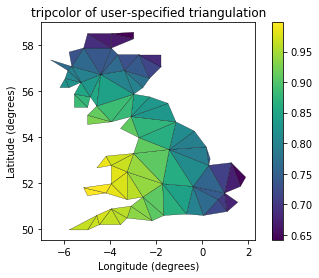

In [8]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np

xy = np.asarray([
    [-0.101, 0.872], [-0.080, 0.883], [-0.069, 0.888], [-0.054, 0.890],
    [-0.045, 0.897], [-0.057, 0.895], [-0.073, 0.900], [-0.087, 0.898],
    [-0.090, 0.904], [-0.069, 0.907], [-0.069, 0.921], [-0.080, 0.919],
    [-0.073, 0.928], [-0.052, 0.930], [-0.048, 0.942], [-0.062, 0.949],
    [-0.054, 0.958], [-0.069, 0.954], [-0.087, 0.952], [-0.087, 0.959],
    [-0.080, 0.966], [-0.085, 0.973], [-0.087, 0.965], [-0.097, 0.965],
    [-0.097, 0.975], [-0.092, 0.984], [-0.101, 0.980], [-0.108, 0.980],
    [-0.104, 0.987], [-0.102, 0.993], [-0.115, 1.001], [-0.099, 0.996],
    [-0.101, 1.007], [-0.090, 1.010], [-0.087, 1.021], [-0.069, 1.021],
    [-0.052, 1.022], [-0.052, 1.017], [-0.069, 1.010], [-0.064, 1.005],
    [-0.048, 1.005], [-0.031, 1.005], [-0.031, 0.996], [-0.040, 0.987],
    [-0.045, 0.980], [-0.052, 0.975], [-0.040, 0.973], [-0.026, 0.968],
    [-0.020, 0.954], [-0.006, 0.947], [ 0.003, 0.935], [ 0.006, 0.926],
    [ 0.005, 0.921], [ 0.022, 0.923], [ 0.033, 0.912], [ 0.029, 0.905],
    [ 0.017, 0.900], [ 0.012, 0.895], [ 0.027, 0.893], [ 0.019, 0.886],
    [ 0.001, 0.883], [-0.012, 0.884], [-0.029, 0.883], [-0.038, 0.879],
    [-0.057, 0.881], [-0.062, 0.876], [-0.078, 0.876], [-0.087, 0.872],
    [-0.030, 0.907], [-0.007, 0.905], [-0.057, 0.916], [-0.025, 0.933],
    [-0.077, 0.990], [-0.059, 0.993]])
x, y = np.rad2deg(xy).T

triangles = np.asarray([
    [67, 66,  1], [65,  2, 66], [ 1, 66,  2], [64,  2, 65], [63,  3, 64],
    [60, 59, 57], [ 2, 64,  3], [ 3, 63,  4], [ 0, 67,  1], [62,  4, 63],
    [57, 59, 56], [59, 58, 56], [61, 60, 69], [57, 69, 60], [ 4, 62, 68],
    [ 6,  5,  9], [61, 68, 62], [69, 68, 61], [ 9,  5, 70], [ 6,  8,  7],
    [ 4, 70,  5], [ 8,  6,  9], [56, 69, 57], [69, 56, 52], [70, 10,  9],
    [54, 53, 55], [56, 55, 53], [68, 70,  4], [52, 56, 53], [11, 10, 12],
    [69, 71, 68], [68, 13, 70], [10, 70, 13], [51, 50, 52], [13, 68, 71],
    [52, 71, 69], [12, 10, 13], [71, 52, 50], [71, 14, 13], [50, 49, 71],
    [49, 48, 71], [14, 16, 15], [14, 71, 48], [17, 19, 18], [17, 20, 19],
    [48, 16, 14], [48, 47, 16], [47, 46, 16], [16, 46, 45], [23, 22, 24],
    [21, 24, 22], [17, 16, 45], [20, 17, 45], [21, 25, 24], [27, 26, 28],
    [20, 72, 21], [25, 21, 72], [45, 72, 20], [25, 28, 26], [44, 73, 45],
    [72, 45, 73], [28, 25, 29], [29, 25, 31], [43, 73, 44], [73, 43, 40],
    [72, 73, 39], [72, 31, 25], [42, 40, 43], [31, 30, 29], [39, 73, 40],
    [42, 41, 40], [72, 33, 31], [32, 31, 33], [39, 38, 72], [33, 72, 38],
    [33, 38, 34], [37, 35, 38], [34, 38, 35], [35, 37, 36]])

xmid = x[triangles].mean(axis=1)
ymid = y[triangles].mean(axis=1)
x0 = -5
y0 = 52
zfaces = np.exp(-0.01 * ((xmid - x0) * (xmid - x0) +
                         (ymid - y0) * (ymid - y0)))

fig3, ax3 = plt.subplots()
ax3.set_aspect('equal')
tpc = ax3.tripcolor(x, y, triangles, facecolors=zfaces, edgecolors='k')
fig3.colorbar(tpc)
ax3.set_title('tripcolor of user-specified triangulation')
ax3.set_xlabel('Longitude (degrees)')
ax3.set_ylabel('Latitude (degrees)')

plt.show()

# Third example: Build your first chatbot using Python

Answer simple questions:

(1) Hi

(2) How are you?

(3) I'm also doing good

(4) What is your name?

(5) What is your age?

(6) Sorry Chatty

In [0]:
from nltk.chat.util import Chat, reflections
pairs = [
    [
        r"my name is (.*)",
        ["Hello %1, How are you today ?",]
    ],
     [
        r"what is your name ?",
        ["My name is Chatty and I'm a chatbot ?",]
    ],
    [
        r"how are you ?",
        ["I'm doing good\nHow about You ?",]
    ],
    [
        r"sorry (.*)",
        ["Its alright","Its OK, never mind",]
    ],
    [
        r"i'm (.*) doing good",
        ["Nice to hear that","Alright :)",]
    ],
    [
        r"hi|hey|hello",
        ["Hello", "Hey there",]
    ],
    [
        r"(.*) age?",
        ["I'm a computer program dude\nSeriously you are asking me this?",]
        
    ],
    [
        r"what (.*) want ?",
        ["Make me an offer I can't refuse",]
        
    ],
    [
        r"(.*) created ?",
        ["Nagesh created me using Python's NLTK library ","top secret ;)",]
    ],
    [
        r"(.*) (location|city) ?",
        ['Chennai, Tamil Nadu',]
    ],
    [
        r"how is weather in (.*)?",
        ["Weather in %1 is awesome like always","Too hot man here in %1","Too cold man here in %1","Never even heard about %1"]
    ],
    [
        r"i work in (.*)?",
        ["%1 is an Amazing company, I have heard about it. But they are in huge loss these days.",]
    ],
[
        r"(.*)raining in (.*)",
        ["No rain since last week here in %2","Damn its raining too much here in %2"]
    ],
    [
        r"how (.*) health(.*)",
        ["I'm a computer program, so I'm always healthy ",]
    ],
    [
        r"(.*) (sports|game) ?",
        ["I'm a very big fan of Football",]
    ],
    [
        r"who (.*) sportsperson ?",
        ["Messy","Ronaldo","Roony"]
],
    [
        r"who (.*) (moviestar|actor)?",
        ["Brad Pitt"]
],
    [
        r"quit",
        ["BBye take care. See you soon :) ","It was nice talking to you. See you soon :)"]
],
]
def chatty():
    print("Hi, I'm Chatty and I chat alot ;)\nPlease type lowercase English language to start a conversation. Type quit to leave ") #default message at the start
    chat = Chat(pairs, reflections)
    chat.converse()
if __name__ == "__main__":
    chatty()

# Fourth Example: Face Detection

https://beta.deepnote.com/project/7d8320a1-1b53-4619-8263-be65e6a1029e#

# Fifth Example: Sentiment Analysis

In [43]:
! pip install textblob

In [46]:
import nltk
nltk.download('movie_reviews')
nltk.download('punkt')
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
opinion = TextBlob("EliteDataScience.com is dope!", analyzer=NaiveBayesAnalyzer())
opinion.sentiment

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Sentiment(classification='neg', p_pos=0.35000000000000003, p_neg=0.6499999999999997)